# Single component comparison with BPZ

In [83]:
import blendz
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
import corner

In [2]:
from os.path import join

pz = blendz.Photoz(data_path=join(blendz.RESOURCE_PATH, 'data/bpz/UDFzspec.cat'),
                   mag_cols = [22, 24, 26, 28, 30, 31], 
                   sigma_cols = [23, 25, 27, 29, 31, 33], 
                   #####################################################################
                   #Settings in here shouldn't be necessary - remove them
                   filter_file_extension='.res',
                   spec_z_col=7,
                   #####################################################################
                   ref_band = 2, ref_mag_lo = 20, ref_mag_hi = 32,
                   zero_point_errors = [0.01, 0.01, 0.01, 0.01, 0.01, 0.01],
                   filters=['HST_ACS_WFC_F435W', 'HST_ACS_WFC_F606W', 'HST_ACS_WFC_F775W', \
                            'HST_ACS_WFC_F850LP', 'nic3_f110w', 'nic3_f160w'])

/home/dan/.pyenv/versions/anaconda2-4.1.0/lib/python2.7/site-packages/blendz/model/bpz.py:65: RuntimeWarning: divide by zero encountered in log
  first = (self.prior_params['alpha_t'][template_type] * np.log(redshift))


In [3]:
pz.sample(1, resample=10000)

[Gal: 57/57, Comp: 1/1, Itr: 1900] : 100%|██████████| 57/57 [11:45<00:00, 10.45s/it]


In [6]:
bpz_results = np.loadtxt('/home/dan/Desktop/UDFzspec.probs')

In [19]:
z_bins = np.arange(0.,10.01,0.01)

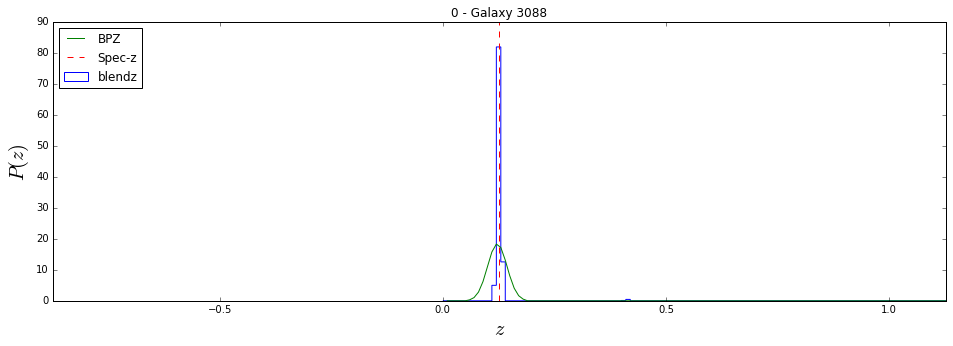

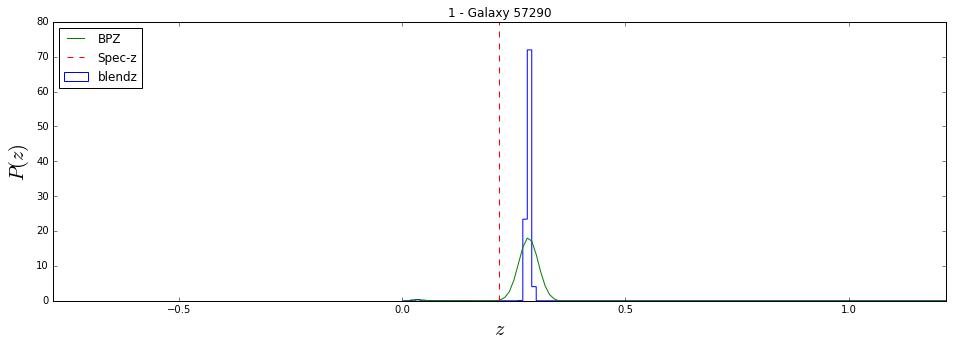

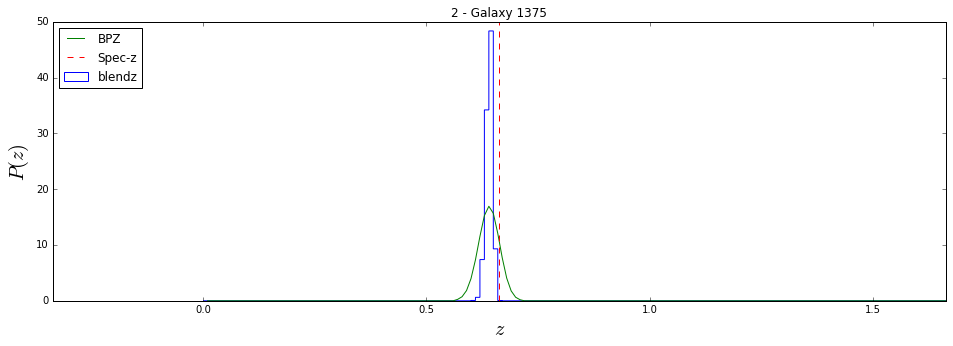

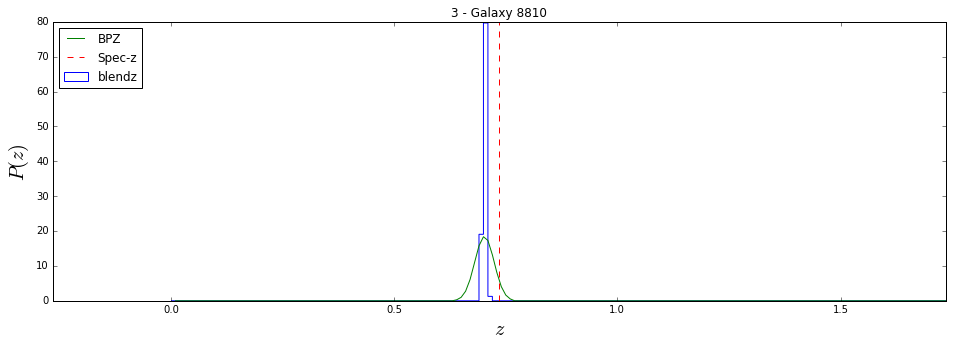

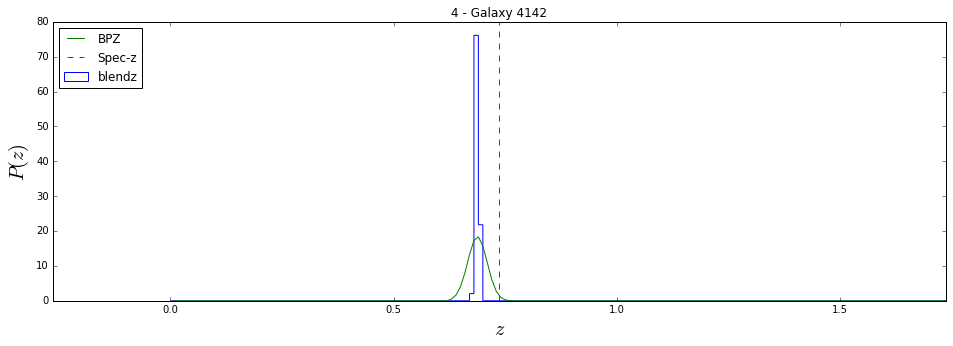

In [82]:
for g in range(5):#range(pz.num_galaxies):
    plt.figure(figsize=(16, 5))
    plt.hist(pz.reweighted_samples[g][1][:, 0], bins=z_bins, color='b', label='blendz', histtype='step', normed=True)
    bpz_norm = 1. / np.sum(bpz_results[g, 1:] * 0.01)
    plt.plot(z_bins[1:], bpz_norm*bpz_results[g, 1:], color='g', label='BPZ', linestyle='-')
    specz = pz.photometry[g].spec_redshift
    plt.axvline(specz, color='r', linestyle='--', label='Spec-z')
    plt.xlim(specz-1., specz+1.)
    plt.legend(loc=0)
    plt.title(r'{} - Galaxy {:.0f}'.format(g, bpz_results[g, 0]))
    plt.xlabel(r'$z$', fontsize=20)
    plt.ylabel(r'$P(z)$', fontsize=20)

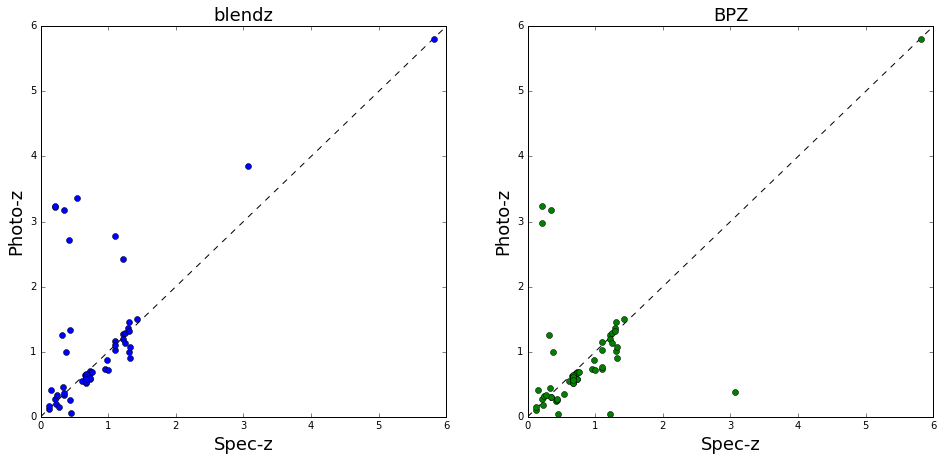

In [95]:
plt.figure(figsize=(16, 7))

plt.subplot(121)

plt.plot(np.linspace(0, 6, 10), np.linspace(0, 6, 10), color='k', linestyle='--')
for g in range(pz.num_galaxies):
    heights, edges = np.histogram(pz.reweighted_samples[g][1][:, 0], bins=z_bins)
    z_blendz = edges[np.argmax(heights)]
    z_bpz = z_bins[np.argmax(bpz_results[g, 1:])]
    specz = pz.photometry[g].spec_redshift
    plt.plot(specz, z_blendz, color='b', marker='o')
plt.title('blendz', fontsize=18)
plt.xlabel(r'Spec-z', fontsize=18)
plt.ylabel(r'Photo-z', fontsize=18)
    
plt.subplot(122)
plt.plot(np.linspace(0, 6, 10), np.linspace(0, 6, 10), color='k', linestyle='--')
for g in range(pz.num_galaxies):
    heights, edges = np.histogram(pz.reweighted_samples[g][1][:, 0], bins=z_bins)
    z_blendz = edges[np.argmax(heights)]
    z_bpz = z_bins[np.argmax(bpz_results[g, 1:])]
    specz = pz.photometry[g].spec_redshift
    plt.plot(specz, z_bpz, color='g', marker='o')
plt.title('BPZ', fontsize=18)
plt.xlabel(r'Spec-z', fontsize=18)
plt.ylabel(r'Photo-z', fontsize=18)